<a href="https://colab.research.google.com/github/clerfayt28/Pitonchik/blob/main/PyTorch_Tutorial_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [24]:
# Device configuration
device = torch.device ('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
num_epochs = 4
batch_size = 4
learning_rate = 0.001

Files already downloaded and verified
Files already downloaded and verified


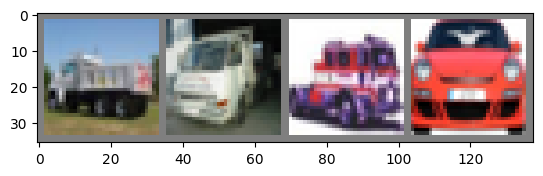

In [25]:
# dataset has PILImage images of range [0, 1]
# We transform them to Tensors of normalized range [-1, 1]

transform = transforms.Compose(
    [transforms.ToTensor (),
     transforms.Normalize ((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10 (root='./content/wine.csv', train=True, download = True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10 (root='./content/wine.csv', train=False, download = True, transform=transform)
train_loader = torch.utils.data.DataLoader (train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader (test_dataset, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

In [29]:
# implement conv net
class ConvNet (nn.Module):
  def __init__ (self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d (2,2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear (16*5*5, 120)
    self.fc2 = nn.Linear (120, 84)
    self.fc3 = nn.Linear (84, 10)

  def forward (self, x):
    # -> n, 3, 32, 32
    x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
    x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
    x = x.view(-1, 16 * 5 * 5)            # -> n, 400
    x = F.relu(self.fc1(x))               # -> n, 120
    x = F.relu(self.fc2(x))               # -> n, 84
    x = self.fc3(x)                       # -> n, 10
    return x

model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD (model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range (num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    #origin shape: [4, 3, 32, 32] = 4, 3, 1024
    # input_layer: 3 input channels, 6 output channels, 5 kernel size
    images = images.to(device)
    labels = labels.to(device)

    #Forward pass
    outputs = model(images)
    loss = criterion (outputs, labels)

    #Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 2000 == 0:
      print (f'Epoch[{epoch+1}/{num_epochs}, Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}]')

  print ('Finished Training')
  PATH = './cnn.pth'
  torch.save(model.state_dict(), PATH)

Epoch[1/4, Step [2000/12500], Loss: 2.2634]
Epoch[1/4, Step [4000/12500], Loss: 2.3078]
Epoch[1/4, Step [6000/12500], Loss: 2.3087]
Epoch[1/4, Step [8000/12500], Loss: 2.3100]
Epoch[1/4, Step [10000/12500], Loss: 2.2602]
Epoch[1/4, Step [12000/12500], Loss: 2.2228]
Finished Training
Epoch[2/4, Step [2000/12500], Loss: 1.9845]
Epoch[2/4, Step [4000/12500], Loss: 1.9882]
Epoch[2/4, Step [6000/12500], Loss: 2.2319]
Epoch[2/4, Step [8000/12500], Loss: 2.1729]
Epoch[2/4, Step [10000/12500], Loss: 1.6576]
Epoch[2/4, Step [12000/12500], Loss: 2.4370]
Finished Training
Epoch[3/4, Step [2000/12500], Loss: 2.1203]
Epoch[3/4, Step [4000/12500], Loss: 1.5488]
Epoch[3/4, Step [6000/12500], Loss: 1.2430]
Epoch[3/4, Step [8000/12500], Loss: 1.0350]
Epoch[3/4, Step [10000/12500], Loss: 1.7346]
Epoch[3/4, Step [12000/12500], Loss: 1.0603]
Finished Training
Epoch[4/4, Step [2000/12500], Loss: 2.1286]
Epoch[4/4, Step [4000/12500], Loss: 0.9795]
Epoch[4/4, Step [6000/12500], Loss: 1.8970]
Epoch[4/4, Step 

In [35]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  n_class_correct = [0 for i in range (10)]
  n_class_samples = [0 for i in range (10)]
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model (images)
    for images, labels in test_loader:
      images = images.to(device)
      labels = labels.to(device)
      outputs = model (images)
      # max returns (value, index)
      _, predicted = torch.max (outputs, 1)
      n_samples += labels.size (0)
      n_correct += (predicted == labels).sum(). item()

      for i in range (batch_size):
        label = labels [i]
        pred = predicted [i]
        if (label == pred):
          n_class_correct[label] += 1
        n_class_samples [label] += 1

    acc = 100.0 * n_correct / n_samples
    print (f'Accuracy of {classes}: {acc} %')

    for i in range (10):
      acc = 100.0*n_class_correct[i]/n_class_samples[i]
      print (f'Accuracy of {classes [i]}: {acc} %')

Accuracy of ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'): 43.97 %
Accuracy of plane: 54.2 %
Accuracy of car: 56.8 %
Accuracy of bird: 26.8 %
Accuracy of cat: 15.1 %
Accuracy of deer: 43.7 %
Accuracy of dog: 39.0 %
Accuracy of frog: 61.9 %
Accuracy of horse: 43.6 %
Accuracy of ship: 49.5 %
Accuracy of truck: 49.1 %
Accuracy of ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'): 43.97 %
Accuracy of plane: 54.2 %
Accuracy of car: 56.8 %
Accuracy of bird: 26.8 %
Accuracy of cat: 15.1 %
Accuracy of deer: 43.7 %
Accuracy of dog: 39.0 %
Accuracy of frog: 61.9 %
Accuracy of horse: 43.6 %
Accuracy of ship: 49.5 %
Accuracy of truck: 49.1 %
Accuracy of ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'): 43.97 %
Accuracy of plane: 54.2 %
Accuracy of car: 56.8 %
Accuracy of bird: 26.8 %
Accuracy of cat: 15.1 %
Accuracy of deer: 43.7 %
Accuracy of dog: 39.0 %
Accuracy of frog: 61.9 %
Accuracy of horse: 43

KeyboardInterrupt: ignored